# EntraÃ®nement des modÃ¨les de clustering

## Objectifs du notebook :
- **Clustering avec K-Means** : DÃ©terminer k optimal et entraÃ®ner le modÃ¨le
- **RÃ©duction de dimensionnalitÃ©** : Appliquer l'ACP pour la visualisation  
- **Analyse des clusters** : InterprÃ©ter les groupes et dÃ©finir les catÃ©gories de risque



# 2. Chargement des donnÃ©es

- Import des donnÃ©es standardisÃ©es issues du notebook de prÃ©traitement 


In [55]:
import pandas as pd
df_cluster= pd.read_csv('../data/df_cluster.csv')
df_cluster=pd.DataFrame(df_cluster)
df_cluster_scaled = pd.read_csv('../data/df_cluster_scaled.csv')
df_cluster_scaled=pd.DataFrame(df_cluster_scaled)

 
- VÃ©rification rapide de la forme et des colonnes



In [56]:
print("\n \nðŸ“Š AperÃ§u des donnÃ©es pour le clustering :\n")
print("DonnÃ©es filtrÃ©es (df_cluster) :")
print(df_cluster.head())
print("\nDonnÃ©es standardisÃ©es (df_cluster_scaled) :")
df_cluster_scaled


 
ðŸ“Š AperÃ§u des donnÃ©es pour le clustering :

DonnÃ©es filtrÃ©es (df_cluster) :
   Glucose   BMI  Age  DiabetesPedigreeFunction
0      148  33.6   50                     0.627
1       85  26.6   31                     0.351
2      183  23.3   32                     0.672
3       89  28.1   21                     0.167
4      116  25.6   30                     0.201

DonnÃ©es standardisÃ©es (df_cluster_scaled) :


Glucose       BMI       Age  DiabetesPedigreeFunction
0    0.889598  0.217690  1.531330                  0.785203
1   -1.205391 -0.862381 -0.172664                 -0.315398
2    2.053480 -1.371557 -0.082980                  0.964648
3   -1.072376 -0.630937 -1.069502                 -1.049132
4   -0.174524 -1.016677 -0.262347                 -0.913551
..        ...       ...       ...                       ...
704 -0.673331  0.109683  2.697220                 -1.033181
705  0.024999  0.711436 -0.531399                 -0.359263
706 -0.008255 -0.924099 -0.262347                 -0.738093
707  0.158014 -0.322346  1.262278                 -0.323374
708 -0.939361 -0.276057 -0.890135                 -0.458955

[709 rows x 4 columns]

# 3. Clustering avec K-Means

## 3.1 DÃ©terminer la valeur optimale de k via la mÃ©thode du coude

Visualisation de la courbe d'inertie pour appuyer le choix de k.

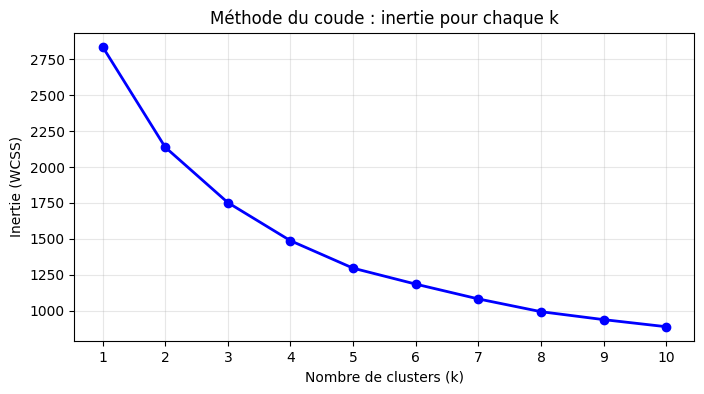

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcul des inerties pour k de 1 Ã  10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation avec annotation de chaque point
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', linewidth=2, markersize=6)

plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (WCSS)')
plt.title('MÃ©thode du coude : inertie pour chaque k')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()


In [58]:
from kneed import KneeLocator
# DÃ©tection automatique du coude
kl = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
k_optimal = kl.elbow
k_optimal=2
print(f"ðŸŽ¯ k optimal selon KneeLocator : {k_optimal}")


ðŸŽ¯ k optimal selon KneeLocator : 2


## 3.2 EntraÃ®ner un modÃ¨le K-Means avec le nombre de clusters choisi


- EntraÃ®nement du modÃ¨le avec ce k  


In [59]:
# EntraÃ®nement du modÃ¨le K-Means avec k optimal
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_cluster_scaled)

print(f"âœ… ModÃ¨le K-Means entraÃ®nÃ© avec k={k_optimal}")
print(f"ðŸ“Š Inertie du modÃ¨le final: {kmeans.inertia_:.2f}")

âœ… ModÃ¨le K-Means entraÃ®nÃ© avec k=2
ðŸ“Š Inertie du modÃ¨le final: 2137.12


## 3.3 Ajouter une colonne Cluster au dataset

In [60]:
df_cluster['cluster'] = cluster_labels

## 3.4 Visualiser la rÃ©partition des observations par cluster et interprÃ©ter les rÃ©sultats

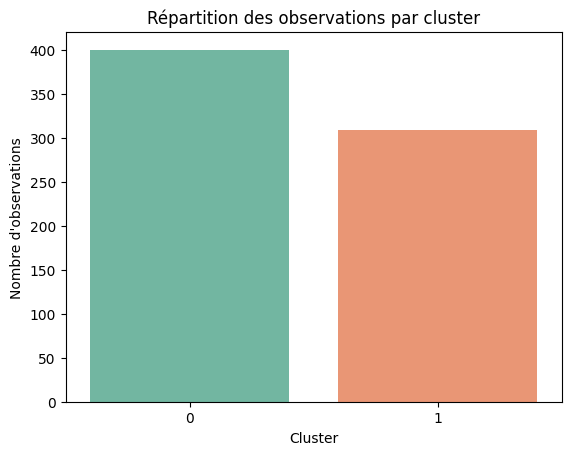

In [61]:
import seaborn as sns
sns.countplot(x='cluster', hue='cluster', data=df_cluster, palette='Set2', legend=False)
plt.title('RÃ©partition des observations par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.show()


# 4. RÃ©duction de dimensionnalitÃ© pour visualisation

## 4.1 Appliquer l'ACP (PCA) pour rÃ©duire les dimensions Ã  2 axes

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_cluster_scaled)
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

## 4.2 RÃ©entraÃ®ner le modÃ¨le K-Means sur les nouvelles dimensions

In [63]:
# RÃ©entraÃ®ner K-Means sur les composantes principales
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(df_pca)
df_pca['cluster'] = cluster_labels_pca

print(f"ðŸ“Š Variance expliquÃ©e par les composantes principales:")
print(f"â€¢ PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"â€¢ PC2: {pca.explained_variance_ratio_[1]:.1%}")
print(f"â€¢ Total: {pca.explained_variance_ratio_.sum():.1%}")
print(f"âœ… K-Means rÃ©entraÃ®nÃ© sur les dimensions PCA")

ðŸ“Š Variance expliquÃ©e par les composantes principales:
â€¢ PC1: 36.1%
â€¢ PC2: 25.4%
â€¢ Total: 61.6%
âœ… K-Means rÃ©entraÃ®nÃ© sur les dimensions PCA


## 4.3 Visualiser les clusters obtenus et analyser la distribution

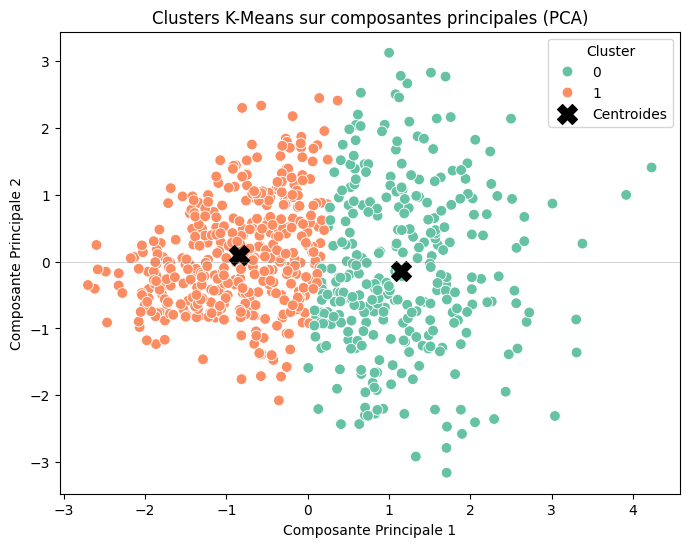

In [64]:
plt.figure(figsize=(8,6))

# Scatter plot of points colored by cluster
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)

# Calculate and plot centroids
centroids = df_pca.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
plt.scatter(centroids['PC1'], centroids['PC2'], s=200, c='black', marker='X', label='Centroides')

# Thin, light x-axis line
plt.axhline(y=0, color='gray', linewidth=0.5, alpha=0.5)

plt.title('Clusters K-Means sur composantes principales (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Cluster')
plt.show()


---

# 5. Analyse des clusters

## 5.1 Calculer les moyennes des caractÃ©ristiques au sein de chaque cluster

In [65]:
# Calculer les moyennes des caractÃ©ristiques par cluster
numeric_columns = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
moyennes_par_cluster = df_cluster.groupby('cluster')[numeric_columns].mean()

print("ðŸ“Š Moyennes des caractÃ©ristiques par cluster :")
print(moyennes_par_cluster.round(2))

ðŸ“Š Moyennes des caractÃ©ristiques par cluster :
         Glucose    BMI  DiabetesPedigreeFunction    Age
cluster                                                 
0         104.93  29.78                      0.37  27.06
1         142.37  35.31                      0.50  40.52


## 5.2 Identification des clusters Ã  haut risque selon les seuils critiques

Le cluster dont les moyennes des variables Glucose (>126), BMI (>30) et Diabetes Pedigree Function (>0,5) dÃ©passent les seuils critiques peut Ãªtre interprÃ©tÃ© comme Ã  haut risque de diabÃ¨te.

In [66]:
# Seuils critiques selon les exigences
seuils_critiques = {
    'Glucose': 126,
    'BMI': 30,
    'DiabetesPedigreeFunction': 0.5
}

print("ðŸŽ¯ Analyse des clusters selon les seuils critiques :")
print(f"Seuils : Glucose > {seuils_critiques['Glucose']}, BMI > {seuils_critiques['BMI']}, DPF > {seuils_critiques['DiabetesPedigreeFunction']}")
print("\nðŸ“Š Ã‰valuation par cluster :")

for cluster in sorted(moyennes_par_cluster.index):
    glucose = moyennes_par_cluster.loc[cluster, 'Glucose']
    bmi = moyennes_par_cluster.loc[cluster, 'BMI']
    dpf = moyennes_par_cluster.loc[cluster, 'DiabetesPedigreeFunction']
    
    # VÃ©rification des seuils critiques
    glucose_depasse = glucose > seuils_critiques['Glucose']
    bmi_depasse = bmi > seuils_critiques['BMI'] 
    dpf_depasse = dpf > seuils_critiques['DiabetesPedigreeFunction']
    
    haut_risque = glucose_depasse and bmi_depasse and dpf_depasse
    
    print(f"\nCluster {cluster}:")
    print(f"  â€¢ Glucose: {glucose:.1f} ({'âœ“' if glucose_depasse else 'âœ—'} > {seuils_critiques['Glucose']})")
    print(f"  â€¢ BMI: {bmi:.1f} ({'âœ“' if bmi_depasse else 'âœ—'} > {seuils_critiques['BMI']})")

    print(f"  â€¢ DPF: {dpf:.3f} ({'âœ“' if dpf_depasse else 'âœ—'} > {seuils_critiques['DiabetesPedigreeFunction']})")
    print(f"  â€¢ Risque: {'ðŸ”´ HAUT RISQUE' if haut_risque else 'ðŸŸ¢ Risque normal'}")

ðŸŽ¯ Analyse des clusters selon les seuils critiques :
Seuils : Glucose > 126, BMI > 30, DPF > 0.5

ðŸ“Š Ã‰valuation par cluster :

Cluster 0:
  â€¢ Glucose: 104.9 (âœ— > 126)
  â€¢ BMI: 29.8 (âœ— > 30)
  â€¢ DPF: 0.373 (âœ— > 0.5)
  â€¢ Risque: ðŸŸ¢ Risque normal

Cluster 1:
  â€¢ Glucose: 142.4 (âœ“ > 126)
  â€¢ BMI: 35.3 (âœ“ > 30)
  â€¢ DPF: 0.504 (âœ“ > 0.5)
  â€¢ Risque: ðŸ”´ HAUT RISQUE


## 5.3 Compter le nombre d'observations par groupe

In [67]:
# Compter le nombre d'observations par cluster
count_par_cluster = df_cluster['cluster'].value_counts().sort_index()
total_observations = len(df_cluster)

print("ðŸ“Š Nombre d'observations par cluster :")
for cluster, count in count_par_cluster.items():
    percentage = (count / total_observations) * 100
    print(f"Cluster {cluster}: {count} observations ({percentage:.1f}%)")

print(f"\nTotal: {total_observations} observations")

ðŸ“Š Nombre d'observations par cluster :
Cluster 0: 400 observations (56.4%)
Cluster 1: 309 observations (43.6%)

Total: 709 observations


## 5.4 Ajouter une colonne risk_category basÃ©e sur le numÃ©ro de cluster

Exemple : si cluster 1 => risque Ã©levÃ© et cluster 0 => faible risque

In [68]:
# Ajouter la colonne 'risk_category' selon le cluster
df_cluster['risk_category'] = df_cluster['cluster'].map({1: 'ðŸ”´ Risque Ã©levÃ©', 0: 'ðŸŸ¢ Faible risque'})

# Affichage clair des correspondances cluster â†” risque
print("\nðŸ“Œ Risque par cluster :")
print(df_cluster[['cluster', 'risk_category']].drop_duplicates())
# RÃ©partition des risques
print("\nðŸ“Š RÃ©partition des risques :")
print(df_cluster['risk_category'].value_counts())




ðŸ“Œ Risque par cluster :
   cluster    risk_category
0        1   ðŸ”´ Risque Ã©levÃ©
1        0  ðŸŸ¢ Faible risque

ðŸ“Š RÃ©partition des risques :
risk_category
ðŸŸ¢ Faible risque    400
ðŸ”´ Risque Ã©levÃ©     309
Name: count, dtype: int64


# 6. Conclusion

SynthÃ¨se des rÃ©sultats obtenus

In [69]:
# Exemple simple de synthÃ¨se des rÃ©sultats
print("RÃ©sumÃ© des clusters et catÃ©gories de risque :")
print(df_cluster.groupby(['cluster', 'risk_category']).size())

RÃ©sumÃ© des clusters et catÃ©gories de risque :
cluster  risk_category  
0        ðŸŸ¢ Faible risque    400
1        ðŸ”´ Risque Ã©levÃ©     309
dtype: int64


In [70]:
df_cluster

Glucose   BMI  Age  DiabetesPedigreeFunction  cluster    risk_category
0        148  33.6   50                     0.627        1   ðŸ”´ Risque Ã©levÃ©
1         85  26.6   31                     0.351        0  ðŸŸ¢ Faible risque
2        183  23.3   32                     0.672        1   ðŸ”´ Risque Ã©levÃ©
3         89  28.1   21                     0.167        0  ðŸŸ¢ Faible risque
4        116  25.6   30                     0.201        0  ðŸŸ¢ Faible risque
..       ...   ...  ...                       ...      ...              ...
704      101  32.9   63                     0.171        1   ðŸ”´ Risque Ã©levÃ©
705      122  36.8   27                     0.340        0  ðŸŸ¢ Faible risque
706      121  26.2   30                     0.245        0  ðŸŸ¢ Faible risque
707      126  30.1   47                     0.349        1   ðŸ”´ Risque Ã©levÃ©
708       93  30.4   23                     0.315        0  ðŸŸ¢ Faible risque

[709 rows x 6 columns]


- Perspectives pour la suite : classification supervisÃ©e, intÃ©gration dans un pipeline complet


In [71]:

# Perspectives possibles
print("\nPerspectives :")
print("- Mettre en place une classification supervisÃ©e pour prÃ©dire le risque sur de nouvelles donnÃ©es.")
print("- IntÃ©grer ce clustering et classification dans un pipeline de traitement complet automatisÃ©.")



Perspectives :
- Mettre en place une classification supervisÃ©e pour prÃ©dire le risque sur de nouvelles donnÃ©es.
- IntÃ©grer ce clustering et classification dans un pipeline de traitement complet automatisÃ©.


# 7. Sauvegarde

Sauvegarde du DataFrame enrichi avec les clusters et catÃ©gories de risque

In [72]:
df_cluster_final = df_cluster.copy()
# Enregistrer le DataFrame final with clusters et catÃ©gories de risque
df_cluster_final.to_csv('../data/df_cluster_final.csv', index=False)

print("DataFrame enrichi sauvegardÃ© dans 'df_cluster_final.csv'.")

DataFrame enrichi sauvegardÃ© dans 'df_cluster_final.csv'.
